<h1 style="text-align: center;" markdown="1"> TRAVAUX PRATIQUE </h1> 
<h2 style="text-align: center;" markdown="2"> Machine Learning Python </h2> 
<h3 style="text-align: center;" markdown="2"> Survived Prediction </h3> 

In [ ]:
import xgboost as xgb

### import package

In [148]:
%matplotlib inline

%load_ext autoreload
%autoreload 2


# data manipulation
import numpy as np
import pandas as pd

# data visualization
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import datasets
from matplotlib import pyplot as plt
from IPython.display import display
import seaborn as sns
import os
sns.set()

# filter warnings
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Chargement des données

In [149]:
path = "Data/train.csv"
path_test = "Data/test.csv"
data_train = pd.read_csv(path, sep=",", index_col="PassengerId")
data_test = pd.read_csv(path_test, sep=",", index_col=0)

In [17]:
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [4]:
print("Nombre de ligne de la base : ", data_train.shape[0])
print("Nombre de colonne de la base : " ,data_train.shape[1])

Nombre de ligne de la base :  891
Nombre de colonne de la base :  11


In [5]:
data_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
data_train.dtypes 
#data_train.count()

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [20]:
#Donnée Manquantes
data_train.isna().sum().sort_values(ascending=False)

Embarked    0
Cabin       0
Fare        0
Ticket      0
Parch       0
SibSp       0
Age         0
Sex         0
Name        0
Pclass      0
Survived    0
dtype: int64

In [21]:
#Survivant
print("les propotions des survivant et non survivants")
data_train["Survived"].value_counts(normalize=True)

les propotions des survivant et non survivants


0    0.616162
1    0.383838
Name: Survived, dtype: float64

##  Data Processing 

## Imputer les valeur manquantes

In [24]:
def Imput_ValeurManquate ( Data, columns_Num, columns_Cat, Imput_Num= "median", 
                          Imput_Cat= "Mode" ) :
    for col in columns_Num :
        if Imput_Num == "median" :
            Change = np.median(Data[col].dropna()) 
        else:  
            Change = int(Imput_Num)
        Data[col] = Data[col].fillna(Change)
    for col in columns_Cat :
        if Imput_Cat == "Mode" :
            Change = str(Data[col].mode()[0])
        else:  
            Change = str(Imput_Cat)
        Data[col] = Data[col].fillna(Change)
    return(Data)    

In [25]:
data_without_na = Imput_ValeurManquate(data_train, ["Age"], ["Cabin", "Embarked"]  )
assert list(data_without_na.isnull().sum() ) == [0]*data_without_na .shape[1]

In [26]:
data_without_na.shape

(891, 11)

##  Caster les variables

In [ ]:
def 

## choix des variables

In [28]:
#cible et choix colonnes 
def DataModel(features , Data , label) :
    Train = Data[features]
    if label in Data.columns :
        label = Data[label]
        return Train, label
        
    return Train
    

In [34]:
#Train
feature = ['SibSp','Parch', 'Fare' ]
Data= data_without_na
Label = "Survived"
X, y = DataModel (feature, Data, Label)
X.head() 

,SibSp,Parch,Fare
PassengerId,,,
1,1,0,7.2500
2,1,0,71.2833
3,0,0,7.9250
4,1,0,53.1000
5,0,0,8.0500


# Baase line

## Modèle:Regression Logistic 

**Verification de la pertinance du Model**

Nous comparerons le score de la cross validation et la moyenne des scores sur des echantilllons de taille differentes.
Ceci nous permet de s'assurer que le model est approprié a la donnée, nous evitons ainsi le overfiting.

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
#construction du model
lr = linear_model.LogisticRegression(random_state=42)

In [43]:
#Apprentissage du model
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [44]:
#Prediction du model
ypred = lr.predict(X_test)

In [46]:
## Score
from sklearn import metrics
score = lr.score(X_train, y_train)
print("le score d'entrainement: {:0.2%}".format(score))


le score d'entrainement: 67.28%


In [47]:
# Score test 
score =Reg_Log.score(X_test, y_test)
print("le score en test: {:0.2%}".format(score))

le score en test: 65.92%


# validation croisée

In [56]:
#Cross validation
from sklearn.model_selection import cross_val_score


In [58]:
scores = cross_val_score(lr, X, y, cv=5, n_jobs=1)

In [59]:
#print('scores:', scores)
print('average score: %.2f'%np.mean(scores))

average score: 0.67


## Etude  des variables

In [60]:
survived = data_without_na[data_without_na.Survived == 1]
dead = data_without_na[data_without_na.Survived == 0]

In [65]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


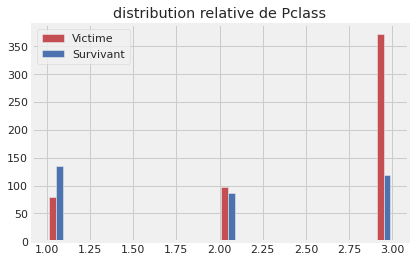

In [66]:
def plot_hist(feature, bins=20):
    x1 = np.array(dead[feature])
    x2 = np.array(survived[feature])
    plt.hist([x1, x2], label=["Victime", "Survivant"], bins=bins, color=['r', 'b'])
    plt.legend(loc="upper left")
    plt.title('distribution relative de %s' %feature)
    plt.show()
plot_hist('Pclass')

## Transtyper les colonnes et dummies

In [70]:
Pclasse = data_without_na[["Pclass"]]
Pclasse.dtypes

Pclass    int64
dtype: object

In [71]:
def float_Str ( Data_str, feature) :
    Data_str[feature] =  Data_str[feature].astype(str)
    return(Data_str)

Pclass = float_Str( Pclasse,'Pclass')
Pclass.dtypes

Pclass    object
dtype: object

In [77]:
X_dummies = pd.get_dummies(Pclass ,drop_first=False, dummy_na=False, prefix_sep='__')
X_dummies.head()

,Pclass__1,Pclass__2,Pclass__3
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
5,0,0,1


In [74]:
X['Pclass1'] = X_dummies["Pclass__1"]
X['Pclass2'] = X_dummies["Pclass__2"]
X['Pclass3'] = X_dummies["Pclass__3"]

## Modèle2 avec la variable Pclass

In [82]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = linear_model.LogisticRegression(random_state= 42)
model.fit(X_train, y_train)
# Run the model
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]
    

In [86]:
## Score
from sklearn import metrics
score = model.score(X_train, y_train)
print("le score d'entrainement: {:0.2%}".format(score))

le score d'entrainement: 69.52%


In [87]:
# Score test 
score =model.score(X_test, y_test)
print("le score en test: {:0.2%}".format(score))

le score en test: 73.18%


## Variable Age

**Distribution de Age** par rapport a la varaiable cible

In [88]:
data_train[["Age"]].describe()

,Age
count,891.000000
mean,29.361582
std,13.019697
min,0.420000
25%,22.000000
50%,28.000000
75%,35.000000
max,80.000000


In [89]:
def PlotHist(X1, X2, feature) :
    # plot histograms
    x1 = np.array(X1[feature].dropna())
    x2 = np.array(X2[feature].dropna())
    plt.hist([x1, x2], label=["Survivant", "Victime"], bins=18, color=['b', 'r'])
       
    # add title and legend to the plot
    plt.title("Distribution des survivant par %s" %feature )
    plt.legend(loc="upper left")
    plt.legend()
    plt.show()

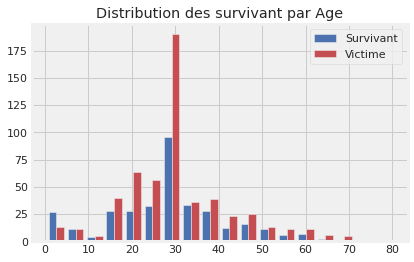

In [90]:
PlotHist(Survived, Not_Survived, "Age")

### Segmentation de Age 

On observe que les individus de moins de 10 ans sont  en majeur partie des survivant et ceux de plus de 10 ans sont des victimes. D'ou une discrimination de l'Age à 10 ans. 


In [91]:
 def Segment_Age(classe, data) :
        data =  data.Age.apply(lambda x : classe[0] if x < 10 else classe[1])
        #return(pd.DataFrame(data))
        return(data)
    

Classe_Age = Segment_Age(classe = [0, 1], data = data_without_na[["Age"]])
Classe_Age.head(10)

PassengerId
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     0
9     1
10    1
Name: Age, dtype: int64

## Model 3 : En prenant en compte la variable Age.

In [100]:
X["age"]= Classe_Age

In [103]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = linear_model.LogisticRegression(random_state= 42)
model.fit(X_train, y_train)
# Run the model
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

## Score
from sklearn import metrics
score = model.score(X_train, y_train)
print("le score d'entrainement: {:0.2%}".format(score))
# Score test 
score =model.score(X_test, y_test)
print("le score en test: {:0.2%}".format(score))

le score d'entrainement: 71.35%
le score en test: 71.51%


In [124]:
titre = data_without_na['Name'].apply(lambda x: x.split(',')[1].split('.')[0])

In [125]:
train_test_data = [data_without_na, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

PassengerId
1         Mr
2        Mrs
3       Miss
4        Mrs
5         Mr
       ...  
887      Rev
888     Miss
889     Miss
890       Mr
891       Mr
Name: Name, Length: 891, dtype: object

## Random Forest

### Prepartion data

In [159]:
#Imputer les na de cabin et Embarked par -1 et les na de Age par sa mediane
X = Imput_ValeurManquate(data_train, ["Age"], ["Cabin", "Embarked"], Imput_Cat=str(-1) )
assert list(X.isnull().sum()) == [0]*X.shape[1]


In [160]:
#Train : Choix des variables
feature = ['SibSp', "Age",'Fare', 'Pclass', 'Parch' ,"Cabin", "Embarked"]
Data= X
Label = "Survived"
X, y = DataModel (feature, Data, Label)
X.head() 

,SibSp,Age,Fare,Pclass,Parch,Cabin,Embarked
PassengerId,,,,,,,
1,1,22.0,7.2500,3,0,-1,S
2,1,38.0,71.2833,1,0,C85,C
3,0,26.0,7.9250,3,0,-1,S
4,1,35.0,53.1000,1,0,C123,S
5,0,35.0,8.0500,3,0,-1,S


In [161]:
#Feature Engeneering
#Transformation de variable Categorielle en Variable numerique correspondant a leurs frequences
def Var_cat_num (df, col_cat) :
    X = df
    for col in col_cat :
        modalite_var = X[col]
        replace = dict(modalite_var.value_counts(normalize = True) )
        modalite_var = list(X[col])
        for modalite in modalite_var :
            modalite_var[modalite_var.index(modalite)]= replace[modalite]
        X[col] = pd.Series(modalite_var)    
    return (X)   

In [162]:
X = Var_cat_num(X, ["Cabin", "Embarked"])
X = X.dropna()
y = y[0:len(list(y))-1]
X.tail()

,SibSp,Age,Fare,Pclass,Parch,Cabin,Embarked
PassengerId,,,,,,,
886,0,39.0,29.125,3,5,0.771044,0.722783
887,0,27.0,13.000,2,0,0.001122,0.722783
888,0,19.0,30.000,1,0,0.771044,0.722783
889,1,28.0,23.450,3,2,0.001122,0.188552
890,0,26.0,30.000,1,0,0.771044,0.086420


In [163]:
#TCodage dijonctif de Pclass en retenat les classe 1 et 3
X['Age'] = Segment_Age(classe = [0, 1], data = X[["Age"]])
del X["Pclass"]
X['Pclass1'] = X_dummies["Pclass__1"]
X['Pclass2'] = X_dummies["Pclass__2"]
X['Pclass3'] = X_dummies["Pclass__3"]
X.head(10)

,SibSp,Age,Fare,Parch,Cabin,Embarked,Pclass1,Pclass2,Pclass3
PassengerId,,,,,,,,,
1,1,1,7.2500,0,0.001122,0.188552,0,0,1
2,1,1,71.2833,0,0.771044,0.722783,1,0,0
3,0,1,7.9250,0,0.002245,0.722783,0,0,1
4,1,1,53.1000,0,0.771044,0.722783,1,0,0
5,0,1,8.0500,0,0.771044,0.086420,0,0,1
6,0,1,8.4583,0,0.001122,0.722783,0,0,1
7,0,1,51.8625,0,0.771044,0.722783,1,0,0
8,3,0,21.0750,1,0.771044,0.722783,0,0,1
9,0,1,11.1333,2,0.771044,0.188552,0,0,1


## **Model 1** : Random Forest Standard

In [164]:
 
X_train, X_test,y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=11)

In [165]:
## Create the model object and fit the model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, n_estimators=100, 
                               criterion="entropy", max_depth=20 ) 
                              
model.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=20, random_state=42)

In [166]:
## Get an initial score
score = model.score(X_test, y_test)
# print the model score
print("In-test score: {:0.2%}".format(score))

In-test score: 69.05%


## Model 2 : Changer les parmetors pour améliorer le score

In [50]:
#Model
RANDOM_STATE =42
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, 
                               max_depth=20, 
                               min_samples_leaf=5, 
                               min_samples_split=5, 
                               random_state=RANDOM_STATE)
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print("In-test score: {:0.2%}".format(score))

In-test score: 73.13%


## **Model 3 :** Grid Search to give the best model and parametors

In [167]:
from sklearn.ensemble import RandomForestClassifier

In [168]:
## import the GridSearchCV object
from sklearn.model_selection import GridSearchCV

## Create the estimator to be passed into GridSearchCV
estimator = RandomForestClassifier(random_state=42)

parameters = {
    'n_estimators': [100, 150, 200,250,300],
    'max_depth': np.arange(6,16,2), 
    'min_samples_split': np.arange(10,30,5),
    'min_samples_leaf': np.arange(5,20,5),
}

model = GridSearchCV(estimator, parameters, verbose=1, cv=5, n_jobs=-1)
model.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  4.0min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([ 6,  8, 10, 12, 14]),
                         'min_samples_leaf': array([ 5, 10, 15]),
                         'min_samples_split': array([10, 15, 20, 25]),
                         'n_estimators': [100, 150, 200, 250, 300]},
             verbose=1)

In [169]:
score = model.score(X_test, y_test)
print("les Parametres du meilleurs model sont :")
print(model.best_estimator_)
print("\n")
print("In-test score of best model RandonForest: {:0.2%}".format(score))

les Parametres du meilleurs model sont :
RandomForestClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=15,
                       n_estimators=150, random_state=42)


In-test score of best model RandonForest: 73.13%


## Best Model and deploiyement

Le meilleur model est le RandomForest avec un score de  0.73, Il est obtenu avec les parametres suivants :
- n_estimators =
- max_depth = 
- min_samples_split = 
- min_samples_leaf =
Ce Model sera construis sur toute la base Train et servira de predicteur pour de nouvelle observation.

In [ ]:
#Best Model on Train
Best_Model = RandomForestClassifier()
Best_Model.fit(X, y)

In [ ]:
#Preparation du test data
#Imputer les na de cabin et Embarked par -1 et les na de Age par sa mediane
X = Imput_ValeurManquate(data_test, ["Age"], ["Cabin", "Embarked"], Imput_Cat=str(-1) )
assert list(X.isnull().sum()) == [0]*X.shape[1]

#Train : Choix des variables
feature = ['SibSp', "Age",'Fare', 'Pclass', 'Parch' ,"Cabin", "Embarked"]
Data= X
Label = "Survived"
X = DataModel (feature, Data, Label)

#ransformation de variable categorielle en variabe num
X = Var_cat_num(X, ["Cabin", "Embarked"])

#Segmentation Age
X['Age'] = Segment_Age(classe = [0, 1], data = X[["Age"]])

#Dummies de Pclasse
X_dummies = pd.get_dummies(X[["Pclass"]] ,drop_first=False, dummy_na=False, prefix_sep='__')
X['Pclass3'] = X_dummies["Pclass__3"]
X['Pclass1'] = X_dummies["Pclass__1"]
del X["Pclass"]

#PredictProba test 
Predict_Proba = Best_Model.predict_proba()

pd.DataFrame(Predict_Proba).head()
